In [35]:
import pandas as pd

In [36]:
df_sim = pd.read_csv('sim.csv')

In [37]:
df_sim = df_sim.drop('Unnamed: 0',axis = 1)

import numpy as np
ar_id = np.array(df_sim.columns)

df_ve_sim = df_sim.to_numpy()
df_sim

,792507,119107,816890,79016,66915,894465,41874,180228,26350,423829,...,3043787,3045620,3099573,3120458,3308665,3359519,3381566,3410250,3455945,3639618
0,0.000000,1.087555,0.666198,0.390326,0.496153,0.908313,0.710927,0.608494,0.683495,1.137942,...,1.477415,0.893373,1.133318,1.233429,1.325490,1.412954,1.417248,1.587404,1.239032,1.422253
1,1.087555,0.000000,1.481321,1.086337,1.329157,1.411251,1.454852,1.141917,0.688969,1.349860,...,2.049002,1.677185,1.791938,1.937022,2.080108,2.010578,2.141643,2.101257,2.020115,2.158360
2,0.666198,1.481321,0.000000,0.649181,0.426498,1.057309,0.428880,0.946119,0.937136,1.426907,...,1.545260,0.867731,1.244695,1.170217,1.153545,1.450564,1.183517,1.720779,1.076274,1.344903
3,0.390326,1.086337,0.649181,0.000000,0.544221,1.023106,0.762539,0.601472,0.661105,1.175481,...,1.667190,1.118884,1.334453,1.407773,1.526957,1.574792,1.602975,1.768401,1.477822,1.675523
4,0.496153,1.329157,0.426498,0.544221,0.000000,0.794855,0.316180,0.681662,0.865706,1.243120,...,1.486742,0.969731,1.144204,1.159159,1.195658,1.396246,1.248496,1.651573,1.176311,1.336409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,1.412954,2.010578,1.450564,1.574792,1.396246,0.962718,1.428228,1.289952,1.901905,1.665676,...,1.275435,1.133191,0.615553,0.453751,0.687256,0.000000,0.930790,1.114001,1.242409,0.930756
5850,1.417248,2.141643,1.183517,1.602975,1.248496,1.146689,1.192253,1.512332,1.842601,1.847010,...,1.231586,0.888023,0.924900,0.600709,0.461645,0.930790,0.000000,1.395375,0.799209,0.710638
5851,1.587404,2.101257,1.720779,1.768401,1.651573,1.377003,1.721505,1.549261,2.012857,1.192322,...,0.649054,1.337243,1.095159,1.151247,1.261527,1.114001,1.395375,0.000000,1.484949,1.300237
5852,1.239032,2.020115,1.076274,1.477822,1.176311,1.352090,1.127083,1.549006,1.624466,1.828776,...,1.320863,0.614203,0.954316,0.920024,0.690774,1.242409,0.799209,1.484949,0.000000,0.534937


In [16]:
import networkx as nx
g = nx.DiGraph()

In [17]:
df_info = pd.read_csv('info.csv')
df_info = df_info.rename({'Unnamed: 0':'id'},axis = 'columns')
df_ve_info = df_info.to_numpy()

In [18]:
df_ve_info[0][0]

74

In [19]:
df_edge = pd.read_csv('edge-rank.csv')
df_edge = df_edge.drop('Unnamed: 0',axis = 1)
df_ve_edge = df_edge.to_numpy()

In [20]:

dict_id = {}
for i in range(len(df_ve_info)):
    id_i = df_ve_info[i][0] 
    dict_id[str(id_i)] = {}
    for j in range(len(df_ve_info)):
        id_j = df_ve_info[j][0]
        dict_id[str(id_i)][str(id_j)] = 0


In [21]:
columns = df_sim.columns


In [22]:
columns

Index(['792507', '119107', '816890', '79016', '66915', '894465', '41874',
       '180228', '26350', '423829',
       ...
       '3043787', '3045620', '3099573', '3120458', '3308665', '3359519',
       '3381566', '3410250', '3455945', '3639618'],
      dtype='object', length=5854)

In [23]:
df_sim['792507'].loc[1]

1.0875546098538225

In [24]:
id_dict = {}
for i in range(len(columns)):
    id_dict[str(i)] = columns[i]

In [25]:
for i in range(len(df_ve_sim)):
    id_i = id_dict[str(i)]
    if id_i in dict_id:
        for j in range(len(df_ve_sim)):
            id_j = id_dict[str(j)]
            if id_j in dict_id[id_i]:
                dict_id[id_i][id_j] = df_ve_sim[i][j]

In [26]:
df_ve_edge

array([[532957, 'Cab Calloway', 'Jazz', ..., 1.0, 1.0, 1.0],
       [532957, 'Cab Calloway', 'Jazz', ..., 1.0, 1.0, 1.0],
       [79016, 'Billie Holiday', 'Vocal', ..., 1.0, 0.953615140437376,
        0.9768075702186879],
       ...,
       [162930, 'Eartha Kitt', 'Vocal', ..., 0.0024466710445484783,
        0.001954128050833951, 0.0022003995476912144],
       [162930, 'Eartha Kitt', 'Vocal', ..., 0.0011316318032626267,
        0.001954128050833951, 0.0015428799270482887],
       [1416172, 'Jack Johnson', 'Religious', ..., 0.0018702181921224144,
        0.00016177432491064564, 0.0010159962585165301]], dtype=object)

In [27]:
for i in range(len(df_ve_edge)):
    inf_i = df_ve_edge[i,0]
    fol_i = df_ve_edge[i,4]
    w = df_ve_edge[i,10]
    g.add_edge(inf_i,fol_i,weight=w)

In [28]:
len(g.edges())

42770

In [29]:
ids = [df_info['id'][i] for i in range(len(df_ve_info))]

In [30]:
def mean_distance_at_k(k, influence_graph=g, ids=ids, dist_dict=dict_id):
    distances = []
    
    for u in ids:
        explored = set([u])
        last_fringe = [u]
        
        # Recursively explore successors until depth k is reached in BFS
        for i in range(k):
            current_fringe = set()
            
            for node in last_fringe:
                successors = influence_graph.successors(node)
                
            for successor in successors:
                if successor not in explored:
                    current_fringe.add(successor)
            
            last_fringe = current_fringe
            explored.update(last_fringe)

        for v in ids:
            if v in current_fringe:
                distances.append(dist_dict[str(u)][str(v)])
            
    return distances, np.mean(distances)

In [31]:
ks = 8
distances_list = []
mean_distances = []

for k in range(1,ks):
    distances, mean = mean_distance_at_k(k)
    distances_list.append(distances)
    mean_distances.append(mean)

In [32]:
import matplotlib.pyplot as plt
plt.title('Histograms of Euclidean Distances by BFS Depth')
for i, distances in enumerate(distances_list):
    plt.hist(distances, bins=100, alpha=0.5, label=str(i+1))
plt.legend()

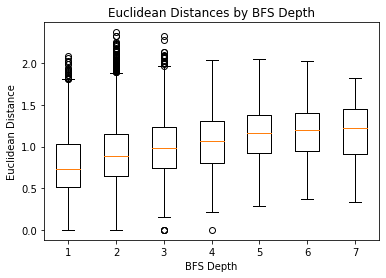

In [33]:
plt.title('Euclidean Distances by BFS Depth')
plt.boxplot(distances_list)
plt.xlabel('BFS Depth')
plt.ylabel('Euclidean Distance')
plt.show()

Text(0, 0.5, 'Mean Distance')

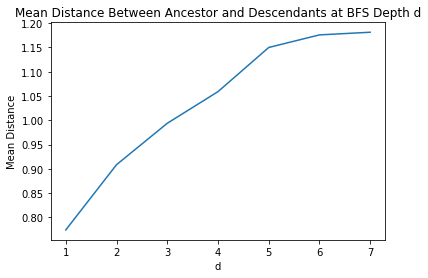

In [34]:
ks = [1,2,3,4,5,6,7]
plt.plot(ks, mean_distances)
plt.title('Mean Distance Between Ancestor and Descendants at BFS Depth d')
plt.xlabel('d')
plt.ylabel('Mean Distance')